# 6.2 (part 2) U.S.A. Real Estate - Exploring Relationships

This script is fine-tuning the last one using the data set with the strong outliers (high price) removed with some extra cleaning here to get rid of the 0s as these were strongly impacting the visualizations
### 1. Import Visualization Libraries and Data
### 2. Data Cleaning
### 3. Exploring Relationships
Correlations, Scatterplots, Pair Plots, Categorical Plots

## 1. Import visualization libraries and data

In [1]:
# import libraries
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# define path
path = r'/Users/nancykray/Desktop/Real Estate Project'


In [ ]:
# import data
df = pd.read_pickle(os.path.join(path,'Prepared Data', 'df_clean4.pkl'))

## 2. Data Cleaning

In [133]:
df.shape

(2220421, 13)

In [134]:
df.describe()

,brokered_by,price,bed,bath,acre_lot,street,zip_code,house_size
count,2.220421e+06,2.220421e+06,2.220421e+06,2.220421e+06,2.220421e+06,2.220421e+06,2.220421e+06,2.220421e+06
mean,5.293869e+04,5.202052e+05,3.275801e+00,2.496206e+00,1.296737e+01,1.012378e+06,5.219362e+04,2.715136e+03
std,3.064363e+04,1.138120e+06,1.386129e+00,1.448251e+00,7.047305e+02,5.823312e+05,2.896017e+04,6.983294e+05
min,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
25%,2.385900e+04,1.650000e+05,3.000000e+00,2.000000e+00,1.700000e-01,5.088420e+05,2.961100e+04,1.456000e+03
50%,5.288400e+04,3.250000e+05,3.000000e+00,2.496373e+00,2.600000e-01,1.012986e+06,4.843300e+04,2.160000e+03
75%,7.918300e+04,5.500000e+05,4.000000e+00,3.000000e+00,6.800000e-01,1.518710e+06,7.807000e+04,2.715133e+03
max,1.101420e+05,9.950000e+07,4.730000e+02,8.300000e+02,1.000000e+05,2.001357e+06,9.999900e+04,1.040400e+09


## 2. a) look at the 0 values 
columns of interest: 'price', 'brokered_by', 'acre_lot', 'zip_code'

####           1) for 'price' (277 rows)

In [135]:
df_zeros_price=df[df['price']==0]

In [136]:
df_zeros_price.shape

(277, 13)

In [137]:
#investigate these 0s
df_zeros_price

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date,Price category
46191,67948.0,for_sale,0.0,3.275919,2.496373,0.17,1378257.0,Paterson,New Jersey,7504.0,4500.000,0,Low price
46192,67948.0,for_sale,0.0,3.275919,2.496373,0.22,1385903.0,Paterson,New Jersey,7504.0,5000.000,0,Low price
49580,92894.0,for_sale,0.0,4.000000,4.000000,0.26,1012209.0,New York,New York,10016.0,2715.133,0,Low price
57766,67929.0,for_sale,0.0,3.275919,2.496373,0.26,360537.0,Jersey City,New Jersey,7302.0,2715.133,2020-03-04,Low price
116218,67937.0,for_sale,0.0,3.275919,1.000000,0.26,1089831.0,Queens,New York,11101.0,2715.133,2021-08-31,Low price
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1329804,91026.0,ready_to_build,0.0,2.000000,2.496373,0.26,558779.0,Brentwood,California,94513.0,1622.000,0,Low price
1329805,91026.0,ready_to_build,0.0,2.000000,2.496373,0.26,558779.0,Brentwood,California,94513.0,1868.000,0,Low price
1329809,91026.0,ready_to_build,0.0,2.000000,2.496373,0.26,485787.0,Brentwood,California,94513.0,1962.000,0,Low price
1329812,91026.0,ready_to_build,0.0,2.000000,2.496373,0.26,485787.0,Brentwood,California,94513.0,1841.000,0,Low price


In [138]:
#check if any of these status categories are left out
df_zeros_price.status.unique()

array(['for_sale', 'ready_to_build'], dtype=object)

##### -there is no 'sold' status on them (this may imply that price has not yet been determined, which would explain why price = 0)
##### - I will go ahead and use a new subset for purposes of cleaning the data for clear visualizations to analyze.  This is a lot of 0s to cloud the charts, but not enough to affect the dataset

In [139]:
# make a subset not including these 0 priced homes
df_real=df[df['price']>0]

In [140]:
# check shape to make sure that this new data set has 277 less rows (2220421-277 = 2220144) Perfect!
df_real.shape

(2220144, 13)

##### EXPORT THIS DATA SET TO CONTINUE CODING AND MONITORING REMAINING 0s in other columns

In [145]:
#export this df_real dataset
df_real.to_pickle(os.path.join(path, 'Prepared Data', 'df_clean5.pkl'))

##### IMPORT THIS DATA SET as df 
### **********THEN IMPORT LIBRARIES AND PATH AND START FROM HERE

In [4]:
#import clean data
df=pd.read_pickle(os.path.join(path, 'Prepared Data', 'df_clean5.pkl'))

In [5]:
df.shape

(2220144, 13)

####         2) for 'brokered_by' (12 rows)

In [6]:
df_zeros_brokered_by=df[df['brokered_by']==0]

In [7]:
df_zeros_brokered_by.shape

(12, 13)

In [8]:
# check these rows to see if there are other blanks or other significant info
df_zeros_brokered_by

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date,Price category
410350,0.0,for_sale,190000.0,3.275919,2.496373,4.27,77775.0,Savannah,Georgia,31419.0,2715.133,0,Middle price
410980,0.0,for_sale,279900.0,3.000000,2.000000,0.20,1623254.0,Savannah,Georgia,31419.0,1728.000,2009-04-06,Middle price
411453,0.0,for_sale,265000.0,4.000000,3.000000,0.22,296128.0,Savannah,Georgia,31419.0,1487.000,2006-07-11,Middle price
1631224,0.0,sold,179900.0,3.000000,2.000000,0.20,93274.0,Rincon,Georgia,31326.0,1100.000,2021-12-03,Middle price
1631594,0.0,sold,212000.0,3.000000,2.000000,0.46,453346.0,Rincon,Georgia,31326.0,1527.000,2022-03-11,Middle price
1656719,0.0,sold,220000.0,3.000000,2.000000,0.22,166242.0,Savannah,Georgia,31419.0,1376.000,2021-12-06,Middle price
1656970,0.0,sold,355000.0,4.000000,3.000000,0.22,642647.0,Savannah,Georgia,31405.0,2026.000,2022-02-25,Middle price
1657301,0.0,sold,340000.0,4.000000,3.000000,0.26,1138378.0,Pooler,Georgia,31322.0,2593.000,2022-01-21,Middle price
1657411,0.0,sold,224900.0,3.000000,2.000000,0.21,1136718.0,Savannah,Georgia,31419.0,1315.000,2022-03-10,Middle price
1657894,0.0,sold,235000.0,3.000000,2.000000,0.19,427351.0,Savannah,Georgia,31419.0,1709.000,2022-01-07,Middle price


In [11]:
#All of these are in Georgia and mostly in Savannah mostly
# filter this dataset to find the median to use for imputing
df_city_Georgia = df[(df['state']=='Georgia') & (df['city']=='Savannah')]

In [12]:
df_city_Georgia

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date,Price category
365612,104308.0,for_sale,120000.0,3.0,1.0,0.19,721792.0,Savannah,Georgia,31404.0,1097.0,0,Middle price
365613,32296.0,for_sale,399000.0,3.0,2.0,0.17,1376034.0,Savannah,Georgia,31405.0,1645.0,2007-12-11,Middle price
365615,58423.0,for_sale,239000.0,3.0,1.0,0.15,746150.0,Savannah,Georgia,31404.0,1200.0,2021-10-20,Middle price
365619,33716.0,for_sale,320000.0,3.0,3.0,0.15,1598016.0,Savannah,Georgia,31407.0,2090.0,2021-08-12,Middle price
365620,78202.0,for_sale,275000.0,4.0,4.0,0.09,1773949.0,Savannah,Georgia,31407.0,1838.0,2017-05-24,Middle price
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1658543,30272.0,sold,284900.0,5.0,3.0,0.21,1567832.0,Savannah,Georgia,31419.0,2460.0,2021-12-22,Middle price
1658544,26716.0,sold,140000.0,2.0,2.0,0.15,231280.0,Savannah,Georgia,31419.0,1261.0,2021-12-22,Middle price
1658545,52608.0,sold,189999.0,3.0,2.0,0.21,653462.0,Savannah,Georgia,31419.0,1154.0,2021-12-22,Middle price
1658546,83601.0,sold,220000.0,3.0,3.0,0.05,1418235.0,Savannah,Georgia,31419.0,1608.0,2021-12-22,Middle price


In [13]:
#find the median for 'brokered_by' 
df_city_Georgia['brokered_by'].median()

52608.0

In [14]:
# REPLACE 0s with this mean for 'brokered_by' column
df['brokered_by'] = df['brokered_by'].replace(0, 52608)    

In [15]:
#double check shape of df
df.shape

(2220144, 13)

In [16]:
#check dataset to make sure 0s are gone (the min here is not 0 so it worked)
df.describe()

,brokered_by,price,bed,bath,acre_lot,street,zip_code,house_size
count,2.220144e+06,2.220144e+06,2.220144e+06,2.220144e+06,2.220144e+06,2.220144e+06,2.220144e+06,2.220144e+06
mean,5.293910e+04,5.202701e+05,3.275812e+00,2.496204e+00,1.296890e+01,1.012381e+06,5.219107e+04,2.715192e+03
std,3.064393e+04,1.138176e+06,1.386187e+00,1.448339e+00,7.047744e+02,5.823285e+05,2.896032e+04,6.983730e+05
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
25%,2.385900e+04,1.650000e+05,3.000000e+00,2.000000e+00,1.700000e-01,5.088508e+05,2.961100e+04,1.455000e+03
50%,5.288400e+04,3.250000e+05,3.000000e+00,2.496373e+00,2.600000e-01,1.012986e+06,4.843000e+04,2.160000e+03
75%,7.918300e+04,5.500000e+05,4.000000e+00,3.000000e+00,6.800000e-01,1.518715e+06,7.807000e+04,2.715133e+03
max,1.101420e+05,9.950000e+07,4.730000e+02,8.300000e+02,1.000000e+05,2.001357e+06,9.999900e+04,1.040400e+09


#### 3) for 'acre_lot' (2225 rows)

In [17]:
df_zeros_acre_lot=df[df['acre_lot']==0]

In [18]:
df_zeros_acre_lot.shape

(2225, 13)

In [19]:
# investigate dataframe to see what could be the reason for these 0 values
df_zeros_acre_lot.head(50)

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date,Price category
1141,63454.0,for_sale,110000.0,3.000000,2.000000,0.0,1359861.0,Gurabo,Puerto Rico,778.0,1409.000,0,Middle price
12083,57226.0,for_sale,379900.0,2.000000,2.000000,0.0,1774133.0,Tewksbury,Massachusetts,1876.0,1026.000,2020-04-28,Middle price
12108,53016.0,for_sale,385000.0,2.000000,1.000000,0.0,114628.0,Tewksbury,Massachusetts,1876.0,996.000,0,Middle price
12154,53016.0,for_sale,419000.0,2.000000,2.000000,0.0,10087.0,Tewksbury,Massachusetts,1876.0,1240.000,2007-09-28,Middle price
13072,8883.0,for_sale,290000.0,5.000000,2.000000,0.0,601854.0,Providence,Rhode Island,2907.0,2680.000,2005-03-28,Middle price
14746,78838.0,for_sale,389900.0,3.000000,1.000000,0.0,890126.0,Warwick,Rhode Island,2888.0,1284.000,2016-01-25,Middle price
15613,23290.0,for_sale,369900.0,2.000000,2.000000,0.0,481648.0,Tewksbury,Massachusetts,1876.0,1023.000,2006-08-24,Middle price
15725,16829.0,for_sale,399000.0,3.275919,1.000000,0.0,1078547.0,Boston,Massachusetts,2115.0,216.000,0,Middle price
15900,21887.0,for_sale,419900.0,2.000000,2.000000,0.0,1310950.0,Tewksbury,Massachusetts,1876.0,1240.000,1998-05-28,Middle price
16187,55379.0,for_sale,379900.0,2.000000,2.000000,0.0,20716.0,Tewksbury,Massachusetts,1876.0,1469.000,2018-08-31,Middle price


In [20]:
#looking at 'status' column, this dataframe
df_zeros_acre_lot.status.unique()

array(['for_sale', 'sold'], dtype=object)

#### there are no 'ready_to_build's listed under status for this 0 acre_lot subset - weird finding, cannot conclude anything

In [21]:
#looking at 'state' column to see if there is a trend (no trend noted)
df_zeros_acre_lot.state.unique()

array(['Puerto Rico', 'Massachusetts', 'Rhode Island', 'New Jersey',
       'New York', 'Pennsylvania', 'West Virginia', 'Maryland',
       'Virginia', 'Delaware', 'District of Columbia', 'North Carolina',
       'South Carolina', 'Georgia', 'Florida', 'Alabama', 'Tennessee',
       'Mississippi', 'Kentucky', 'Ohio', 'Indiana', 'Michigan', 'Iowa',
       'South Dakota', 'Nebraska', 'Illinois', 'Minnesota', 'Missouri',
       'Kansas', 'Louisiana', 'Oklahoma', 'Texas', 'Colorado', 'Idaho',
       'Arizona', 'New Mexico', 'Nevada', 'California', 'Washington',
       'Wisconsin', 'Montana', 'Arkansas'], dtype=object)

##### I will go ahead and remove these from the dataset

In [22]:
#create new subset without these
df_new=df[df['acre_lot']>0]

In [23]:
#check that it has exactly 2225 less rows (2220144-2225 =2217919) -Perfect!
df_new.shape

(2217919, 13)

#### 4) for 'zip_code' ( )

In [25]:
df_zeros_zip=df_new[df_new['zip_code']==0]

In [26]:
df_zeros_zip.shape

(1, 13)

In [27]:
#lets look at it (to see if we can derive a zip from the city)
df_zeros_zip

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date,Price category
160546,102093.0,for_sale,3000000.0,7.0,6.0,0.26,1760549.0,Balzola,California,0.0,6889.0,0,High price


In [28]:
#check main data frame for CA to find other 'Balzola' zip codes
df_new['city'].values

array(['Adjuntas', 'Adjuntas', 'Juana Diaz', ..., 'Richland', 'Richland',
       'Richland'], dtype=object)

In [29]:
df_new['city'].isin(['Balzola']).any()

True

In [30]:
#check any other city listed with 'Balzola' to see the zip.
df_new[(df.city == 'Balzola')]

/var/folders/fb/2jrdrrb52mv7jbhxt0nbx_740000gn/T/ipykernel_74815/297548457.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_new[(df.city == 'Balzola')]


,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date,Price category
160546,102093.0,for_sale,3000000.0,7.0,6.0,0.26,1760549.0,Balzola,California,0.0,6889.0,0,High price


##### DROP THIS ROW from dataset as there is no 'Balzola' listed in California

In [31]:
#get the index of this row first prior to dropping it using this example
#i = df[((df.Name == 'jhon') &( df.Age == 15) & (df.Grade == 'A'))].index
i = df_new[((df_new.brokered_by == 102093.0	) &( df_new.status == 'for_sale') & (df_new.price == 3000000.0) & (df_new.bed ==7.0) & (df_new.bath ==6.0) & (df_new.acre_lot == .26) & (df_new.street ==1760549.0) & (df_new.city=='Balzola') & (df_new.state =='California') & (df_new.zip_code==0.0) & (df_new.house_size ==6889.0) & (df_new.prev_sold_date==0) )].index                                                                   

##### AND THEN DROP IT

In [32]:
#I added inplace-True to permanently delete from df as it was still there without it
df_new.drop(i, inplace=True)

/var/folders/fb/2jrdrrb52mv7jbhxt0nbx_740000gn/T/ipykernel_74815/3626819667.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.drop(i, inplace=True)


In [34]:
# check shape (has 1 less row, good) - previously 2217919
df_new.shape

(2217918, 13)

In [35]:
# double check if this exists in dataframe - good that we have 'False' response, meaning it is not there
df_new['city'].isin(['Balzola']).any()

False

#### EXPORT FINAL DATAFRAME WITH 0s removed

In [36]:
# export dataframe 
df_new.to_pickle(os.path.join(path, 'Prepared Data', 'df_clean6.pkl'))

#### IMPORT  VISUALIZATION-READY DATAFRAME

In [5]:
# import new dataframe
df=pd.read_pickle(os.path.join(path, 'Prepared Data', 'df_clean6.pkl'))

In [6]:
df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date,Price category
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.000,0,Middle price
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.000,0,Low price
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.000,0,Low price
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.000,0,Middle price
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,2715.133,0,Low price


### Missing Value check

In [7]:
# Check for missing values

df.isnull().sum() # No missing values!


brokered_by       0
status            0
price             0
bed               0
bath              0
acre_lot          0
street            0
city              0
state             0
zip_code          0
house_size        0
prev_sold_date    0
Price category    0
dtype: int64

### Dulicates check

In [8]:
# Find duplicates

df_dups = df[df.duplicated()]

In [11]:
#no duplicates found
df_dups.shape

(0, 13)

### Mixed Data Type Check

In [12]:
for col in df.columns.tolist():
      weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df[weird]) > 0:
        print (col)
        
# ok, since we changed the NaNs to 0 in the last dataset, it is showing up as mixed data.  df

/var/folders/fb/2jrdrrb52mv7jbhxt0nbx_740000gn/T/ipykernel_77109/2644494205.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
/var/folders/fb/2jrdrrb52mv7jbhxt0nbx_740000gn/T/ipykernel_77109/2644494205.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
/var/folders/fb/2jrdrrb52mv7jbhxt0nbx_740000gn/T/ipykernel_77109/2644494205.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
/var/folders/fb/2jrdrrb52mv7jbhxt0nbx_740000gn/T/ipykernel_77109/2644494205.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
/var/fol

prev_sold_date


/var/folders/fb/2jrdrrb52mv7jbhxt0nbx_740000gn/T/ipykernel_77109/2644494205.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)


In [13]:
#change 'prev_sold_date' to string
df['prev_sold_date'] = df ['prev_sold_date'].astype('str')

In [14]:
#re-check that changes have been made to datatype

for col in df.columns.tolist():
      weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df[weird]) > 0:
        print (col)
        
# all looks good now

/var/folders/fb/2jrdrrb52mv7jbhxt0nbx_740000gn/T/ipykernel_77109/2041796189.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
/var/folders/fb/2jrdrrb52mv7jbhxt0nbx_740000gn/T/ipykernel_77109/2041796189.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
/var/folders/fb/2jrdrrb52mv7jbhxt0nbx_740000gn/T/ipykernel_77109/2041796189.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
/var/folders/fb/2jrdrrb52mv7jbhxt0nbx_740000gn/T/ipykernel_77109/2041796189.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
/var/fol

## 3. Exploring Relationships
   Clarifying Quesions: 

   What geographic areas have most/least sold houses? (cities/states/zip codes)
   What areas have houses with highest?lowest costs?
   When have most houses been sold/bought?  Is there a seasonal trend?  Does this vary across regions?
   Have the market trends changed over time?

   Does size affect the market? Does bigger acre_lot or house_size impact selling?
   Do multi-family homes/larger complexes make up more of the market in cities vs rural areas?  
   Do single family homes sell more in rural areas?

   Do certain Brokers sell more houses?
   Do new builds sell more than previous sold houses?
   Do number of baths (i.e: 2+ baths) sell more than homes with only 1 bath?
   Do number of bedrooms influence houses sold?

In [15]:
# Create a correlation matrix using pandas

df.corr()

ValueError: could not convert string to float: 'for_sale'

#### ASK MENTOR
note: should I create a derived column for 'status' to represent 1='for_sale', 2='ready_to_build', &3='sold in order to interpret this info in a visualization/chart?

In [16]:
# pick out variables to explore narrow down columns (note: remove ID, dates, & index variables)
# look at columns again
df.columns

Index(['brokered_by', 'status', 'price', 'bed', 'bath', 'acre_lot', 'street',
       'city', 'state', 'zip_code', 'house_size', 'prev_sold_date',
       'Price category'],
      dtype='object')

In [17]:
# create subset for vis excluding columns: 
# remove (temporal: 'date') and (spatial: 'street','zip_code', city', 'state', 'zip_code'), and ('status')
# will investigate these features later

sub = df[['brokered_by', 'price', 'bed', 'bath','acre_lot', 'house_size']]

In [18]:
sub.columns

Index(['brokered_by', 'price', 'bed', 'bath', 'acre_lot', 'house_size'], dtype='object')

In [26]:
# a look at the stats now that all of the 0s are removed from the columns we need
df.describe()

,brokered_by,price,bed,bath,acre_lot,street,zip_code,house_size
count,2.217918e+06,2.217918e+06,2.217918e+06,2.217918e+06,2.217918e+06,2.217918e+06,2.217918e+06,2.217918e+06
mean,5.293758e+04,5.203934e+05,3.276331e+00,2.496360e+00,1.298192e+01,1.012469e+06,5.219697e+04,2.716077e+03
std,3.064470e+04,1.138340e+06,1.386438e+00,1.448736e+00,7.051279e+02,5.823452e+05,2.895982e+04,6.987233e+05
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e-02,0.000000e+00,6.010000e+02,4.000000e+00
25%,2.385900e+04,1.650000e+05,3.000000e+00,2.000000e+00,1.700000e-01,5.089412e+05,2.961500e+04,1.456000e+03
50%,5.288350e+04,3.250000e+05,3.000000e+00,2.496373e+00,2.600000e-01,1.012986e+06,4.843300e+04,2.160000e+03
75%,7.918300e+04,5.500000e+05,4.000000e+00,3.000000e+00,6.800000e-01,1.518812e+06,7.807000e+04,2.715133e+03
max,1.101420e+05,9.950000e+07,4.730000e+02,8.300000e+02,1.000000e+05,2.001357e+06,9.999900e+04,1.040400e+09


## Correlations:

In [19]:
# Create a correlation matrix using pandas

sub.corr()

,brokered_by,price,bed,bath,acre_lot,house_size
brokered_by,1.000000,-0.012052,0.003259,-0.003541,0.000380,-0.000447
price,-0.012052,1.000000,0.185810,0.288913,0.024785,0.000407
bed,0.003259,0.185810,1.000000,0.579157,0.001092,0.000835
bath,-0.003541,0.288913,0.579157,1.000000,-0.000415,0.000888
acre_lot,0.000380,0.024785,0.001092,-0.000415,1.000000,0.000008
house_size,-0.000447,0.000407,0.000835,0.000888,0.000008,1.000000


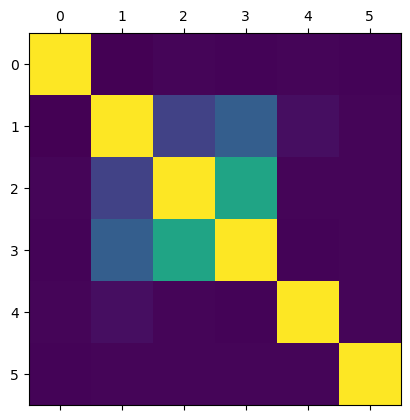

In [20]:
# Create a correlation heatmap using matplotlib

plt.matshow(sub.corr())
plt.show()


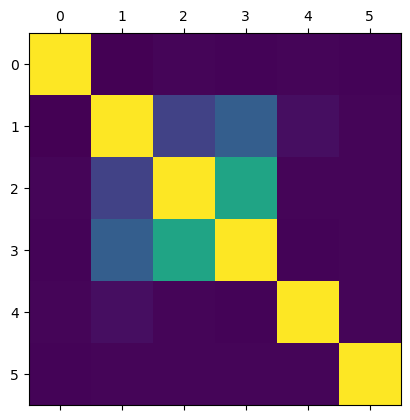

In [21]:
# Save figure
plt.matshow(sub.corr())
plt.savefig("out.png") 

# This will save the image in the working directory. 
# the next line shows the directory

In [22]:
#current directory to see where the saved image goes
cwd = os.getcwd()
cwd

'/Users/nancykray/Desktop/Real Estate Project/Scripts'

Text(0.5, 1.0, 'Correlation Matrix')

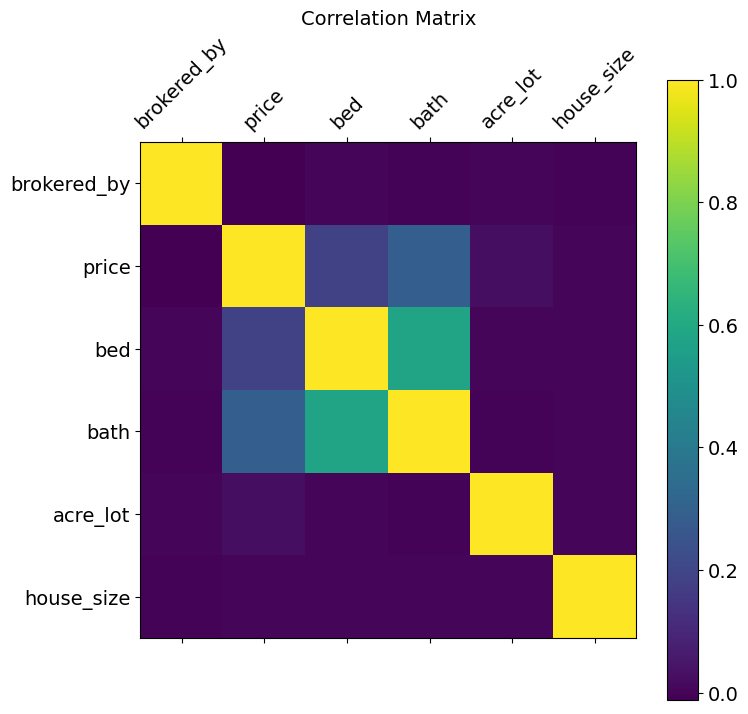

In [23]:
# Add labels, a legend, and change the size of the heatmap (remember that 'df' is now 'sub')

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(sub.corr(), fignum=f.number) # type of plot
plt.xticks(range(sub.shape[1]), sub.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(sub.shape[1]), sub.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

this forces you to constantly cross reference the colors in the chart with the legend, leaving the exact correlation coefficients effectively obscure. In order to best interpret the data, let's use a heatmap below:

### Create a correlation heatmap using seaborn:

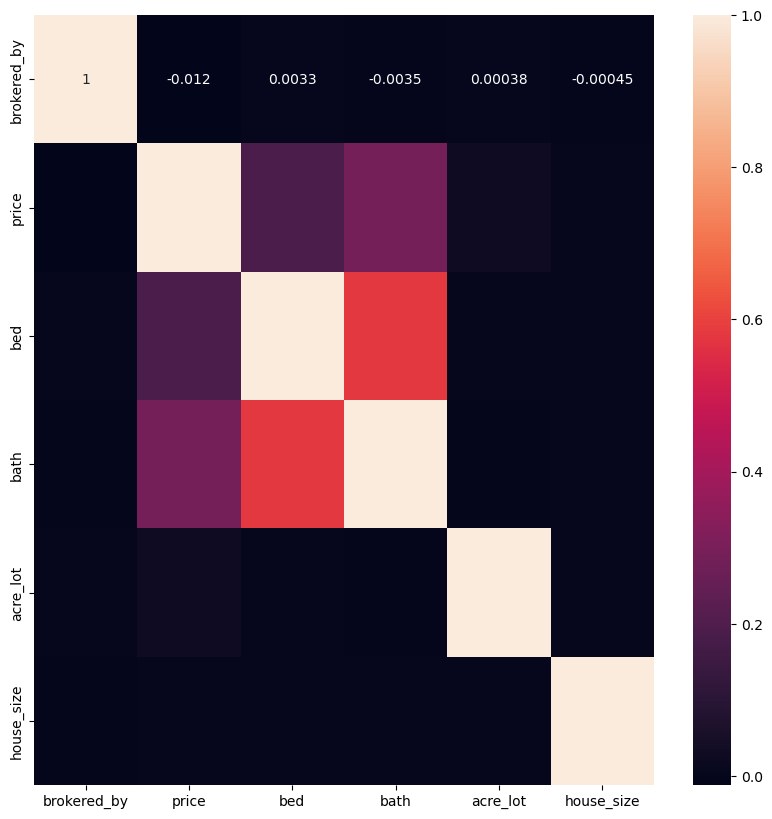

In [24]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

This correlation heatmap shows that strongest relationships are highlighted in red (as this is the lightest color shown besides white and white does not count as these are perfect 1s due to variables crossing paths with themselves)

These stronger relationships are between number of baths with number of beds. This makes sense as houses with more bedrooms will likely have more bathrooms.

A weaker correlation (shown in purple) is shown between 'price' and 'number of bathrooms' And weaker yet (darker purple) is the relationship between 'price' and 'number of bedrooms'

In [54]:
f,ax.figure.savefig('hmx2.png', transparent=True, bbox_inches='tight')

(<Figure size 1000x1000 with 2 Axes>, None)

### Scatterplots:

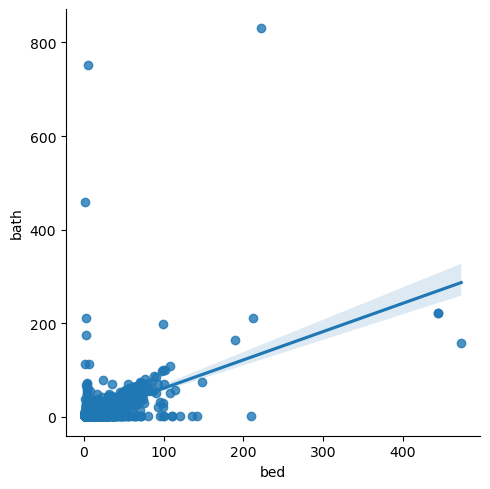

In [25]:
# Create a scatterplot for the "bed" and "bath" columns in seaborn (since these have strongest correlation)

sns.lmplot(x = 'bed', y = 'bath', data = df)

This scatterplot shows the linear trend of a positive correlation between number of bedrooms and number of bathrooms. There are a few outliers in this dataset shown here as well.

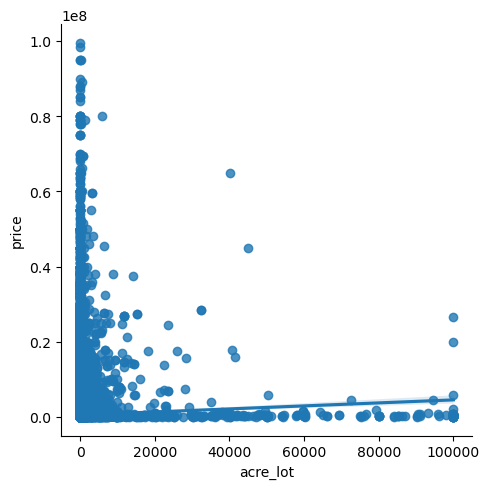

In [27]:
# Create a scatterplot for the "acre_lot" and "price" columns in seaborn (since I want to see what's going on)

sns.lmplot(x = 'acre_lot', y = 'price', data = df)

This scatterplot shows a high concentration of high prices for low acre_lot (for some unknown reason), but then there is a slight positive correlation showing as expected that the bigger the acre lot, the higher the price.  

In [31]:
#check to make sure house_size is not 0
df.house_size.min()

4.0

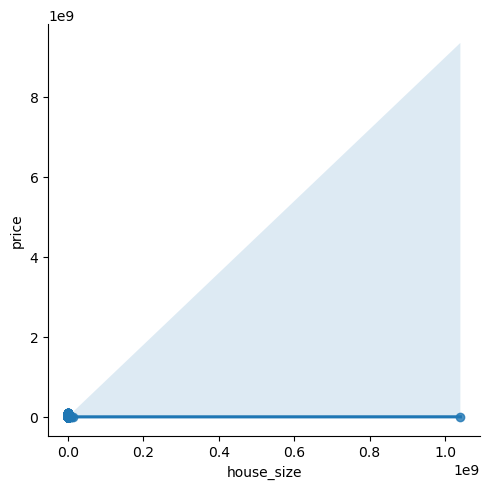

In [32]:
# Create a scatterplot for the "house_size" and "price" columns in seaborn (since I want to see what's going on)

sns.lmplot(x = 'house_size', y = 'price', data = df)

This shadow trend shows the higher house_size, the higher the price, as expected, however, the line stays at 0.  I am not sure I understand why this shadow produces that trajectory without data points along its path.  Will need to further investigate what is going on.

### Pair plots:

In [33]:
# review the columns from 'sub' subset of dataframe to narrow down what I want to keep for the pair plots
sub.columns

Index(['brokered_by', 'price', 'bed', 'bath', 'acre_lot', 'house_size'], dtype='object')

In [34]:
# Keep only the variables you want to use in the pair plot (create another subset dataframe)

sub_2 = sub[['price', 'bed', 'bath', 'acre_lot', 'house_size']]

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

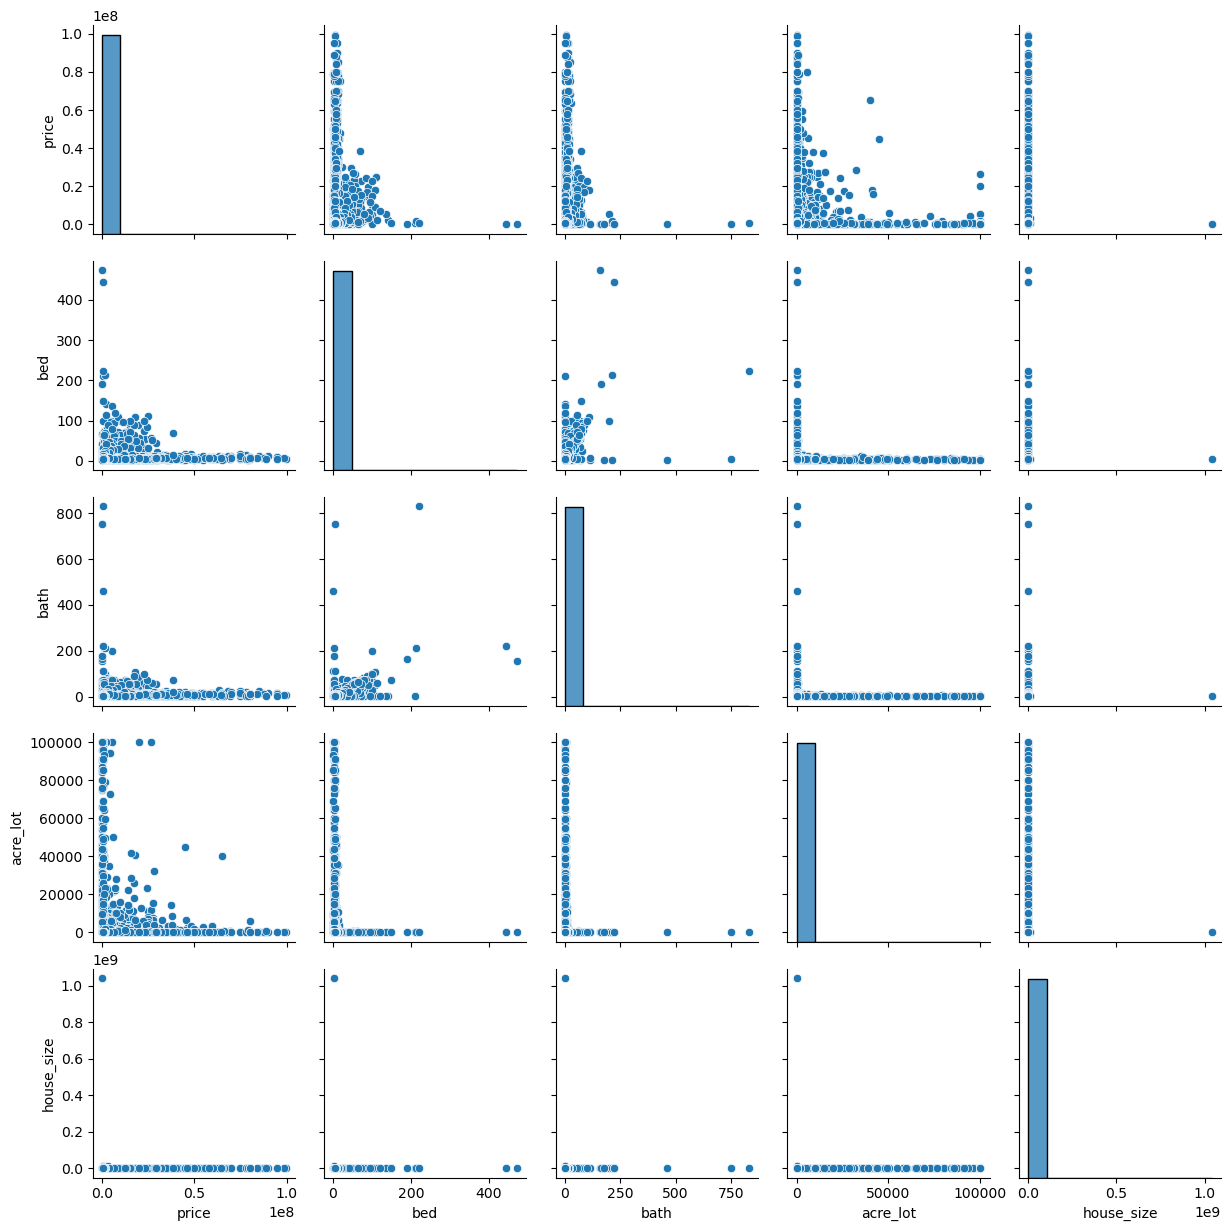

In [35]:
# Create a pair plot (modify bin# - otherwise not executing)
sns.pairplot(sub_2, diag_kws = {'bins': 10})

##### I would like to further explore realtionshps between: price & acre_size, price & house_size since these charts must be still skewed by data numbers as they do not show the expected trajecory of (bigger size, the higher the price).  There is only one outlier up high and then the remaining are staying very low.  This data needs to be better understood prior to analyzing.

#### Most of these relationships are showing negative correlations for some reason:
###### -the higher the price, the less bedrooms it has
###### -the higher the price, the less bathrooms it has
###### -the lower the acre lot size, the higher the lower the price

### Categorical Plots:
Creating a categorical variable that splits the "price" column into categories

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

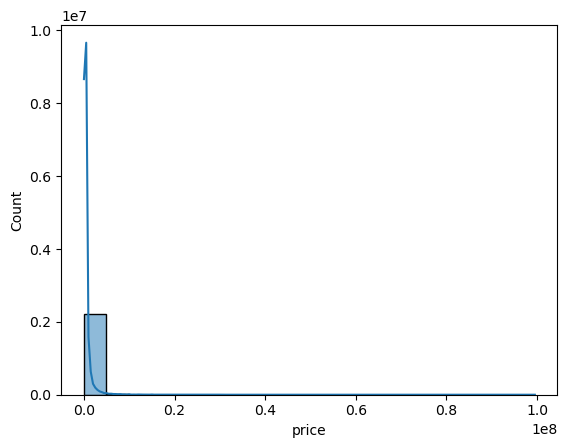

In [37]:
# Use a histogram to visualize the distribution of the variables. 
# This way, you can determine sensible categories for the price ranges. 
# You don't want to end up with too few observations in any one of the categories.
# The argument "kde" add a line that encompasses the distribution

sns.histplot(df['price'], bins = 20, kde = True)


In [38]:
#look at numbers to see the range
sub.describe()

,brokered_by,price,bed,bath,acre_lot,house_size
count,2.217918e+06,2.217918e+06,2.217918e+06,2.217918e+06,2.217918e+06,2.217918e+06
mean,5.293758e+04,5.203934e+05,3.276331e+00,2.496360e+00,1.298192e+01,2.716077e+03
std,3.064470e+04,1.138340e+06,1.386438e+00,1.448736e+00,7.051279e+02,6.987233e+05
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e-02,4.000000e+00
25%,2.385900e+04,1.650000e+05,3.000000e+00,2.000000e+00,1.700000e-01,1.456000e+03
50%,5.288350e+04,3.250000e+05,3.000000e+00,2.496373e+00,2.600000e-01,2.160000e+03
75%,7.918300e+04,5.500000e+05,4.000000e+00,3.000000e+00,6.800000e-01,2.715133e+03
max,1.101420e+05,9.950000e+07,4.730000e+02,8.300000e+02,1.000000e+05,1.040400e+09


In [39]:
#check the median since there is such a concentration in the lower range
sub['price'].median()

325000.0

In [41]:
df.loc[df['price'] < 100000, 'Price category'] = 'Low Price'

In [42]:
df.loc[(df['price'] >= 100000.0) & (df['price'] <= 600000.0), 'Price category'] = 'Middle Price'

In [43]:
df.loc[df['price'] >500000.0, 'Price category'] = 'High Price'

In [44]:
df['Price category'].value_counts(dropna = False)

Price category
Middle price    1238596
High Price       625731
Low price        353591
Name: count, dtype: int64

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Categorical Plot')

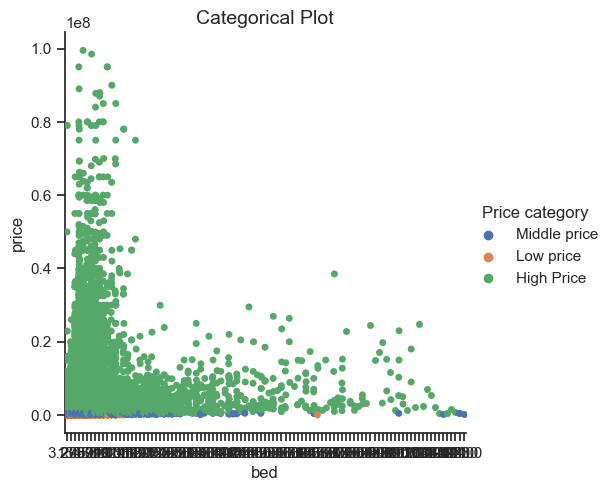

In [51]:
# Create a categorical plot in seaborn using the price categories (compare price and bed)

sns.set(style='ticks')
g = sns.catplot(x='bed', y='price', hue='Price category', data=df)

plt.title('Categorical Plot', fontsize=14) # add title

In [52]:
# fig = g.get_figure()
g.savefig('cat_plot_bed_price2.png') 

This categorical plot shows that most of the houses in this dataset are listed as high priced, even if there are multiple bedrooms or only 1.  The x-axis ticks are hard to read since it is crowded, however there are a few scattered orange points signifying low priced homes, and they are not at the lower end of the scale (they likely have multiple bedrooms)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Categorical Plot')

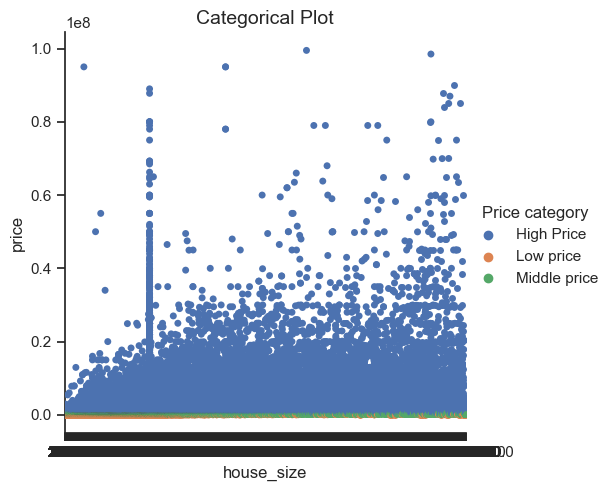

In [55]:
# Create a categorical plot in seaborn using the price categories (compare price and house_size)

sns.set(style='ticks')
g = sns.catplot(x='house_size', y='price', hue='Price category', data=df)

plt.title('Categorical Plot', fontsize=14) # add title

In [56]:
# fig = g.get_figure()
g.savefig('cat_plot_house_size_price2.png') 

This distribution shows a slight increase in concentrated data points in a positive correlation (as expected) where the higher the house_size the higher the price.  This is also affected by several outliers scattered throughout, specifically in one concentrated spot toward the lower end of house size.  This could represent a city area, with several smaller units sold for higher prices.

It is likely that the size of the acre lot or the house itself are not impacting the price as much as expected due to other factors, such as geography.  Perhaps, the prices are more influenced by cities and cost of living in certain area.  Example: my home on the outskirts of Chicago is worth much less than some condos that are in the heart of downtown, Chicago, even though it is much smaller in size.

##### Clarifying Quesions: 

##### To be explored:
   What geographic areas have most/least sold houses? (cities/states/zip codes)
   What areas have houses with highest?lowest costs?
   When have most houses been sold/bought?  Is there a seasonal trend?  Does this vary across regions?
   Have the market trends changed over time?

   Does size affect the market? Does bigger acre_lot or house_size impact selling?
   Do multi-family homes/larger complexes make up more of the market in cities vs rural areas?  
   Do single family homes sell more in rural areas?

   Do certain Brokers sell more houses?
   Do new builds sell more than previous sold houses?
   
   Do number of baths (i.e: 2+ baths) sell more than homes with only 1 bath?
   Do number of bedrooms influence houses sold? 
   
The only true relationship I was able to show clearly in this data was that when a house has more bedrooms, it also tends to have more bathrooms.